In [77]:
# TODO Tiffany - education and malnutrition
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

In [78]:
def init_data(csv):
    if "education" in csv:
        education = pd.read_csv(csv, skiprows = 4)
        return education
        # education.head()
    if "GDP" in csv:
        gdp = pd.read_csv(csv, skiprows = 4)
        return gdp
    if "malnutrition" in csv:
        malnutrition = pd.read_csv(csv, skiprows = 4)
        return malnutrition
    if "poverty" in csv:
        poverty = pd.read_csv(csv, skiprows = 4)
        return poverty
    if "swine" in csv:
        swine_flu = pd.read_csv(csv)
        return swine_flu
    # if "poverty" in csv:

In [79]:
# script_dir = os.path.dirname(__file__)
edu_full_path = os.path.expanduser('~/Desktop/Grad School/COMP 4447/Final Project/COMP-4447-Final-Project/data/world_bank_data/education.csv')
education = init_data(edu_full_path)
education["Country"] = education["Country Name"]
education = education.drop(["Country Name"], axis = 1).reindex()
# fixing columns
cols = list(education.columns.values)
cols.pop(cols.index('Country'))
education = education[["Country"]+cols]
education["mean"] = education.mean(axis = 1)
# education = education.bfill(axis = "columns")
education.head()

C:\Users\tiz081\AppData\Local\Temp/ipykernel_16220/3754657841.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  education["mean"] = education.mean(axis = 1)


,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,mean
0,Aruba,ABW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.570641,101.180557,NaN,NaN,NaN,NaN,NaN,NaN,94.970167
1,Africa Eastern and Southern,AFE,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.495041,84.414948,85.625328,84.330589,NaN,42.681055
3,Africa Western and Central,AFW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.046506


In [80]:
swine_full_path = os.path.expanduser('~/Desktop/Grad School/COMP 4447/Final Project/COMP-4447-Final-Project/data/swine_flu/swine_flu_data.csv')
swine = init_data(swine_full_path)
#sort
swine = swine.sort_values(by = "Country")
swine.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
2110,2009-07-01,Algeria,2,0,https://www.who.int/csr/don/2009_07_01a/en/
2355,2009-07-06,Algeria,5,0,https://www.who.int/csr/don/2009_07_06/en/
1994,2009-06-29,Algeria,2,0,https://www.who.int/csr/don/2009_06_29/en/
1882,2009-06-26,Algeria,2,0,https://www.who.int/csr/don/2009_06_26/en/
1774,2009-06-24,Algeria,2,0,https://www.who.int/csr/don/2009_06_24/en/


In [81]:
#drop the link column
swine = swine.drop(["Link"], axis = 1)
swine.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths
2110,2009-07-01,Algeria,2,0
2355,2009-07-06,Algeria,5,0
1994,2009-06-29,Algeria,2,0
1882,2009-06-26,Algeria,2,0
1774,2009-06-24,Algeria,2,0


In [83]:
swine["Percent of Deaths"] = swine["Cumulative no. of deaths"]/swine["Cumulative no. of cases"]
swine = swine.groupby(["Country"]).sum().reset_index()
swine.head()

,Country,Cumulative no. of cases,Cumulative no. of deaths,Percent of Deaths
0,Algeria,19,0,0.000000
1,Antigua and Barbuda,12,0,0.000000
2,Argentina,14045,175,0.012460
3,Australia,39519,39,0.000987
4,Austria,173,0,0.000000


In [50]:
#List of countries
cc = []
for i in swine["Country"]:
    if i not in cc:
        cc.append(i)
    else:
        continue
# cc


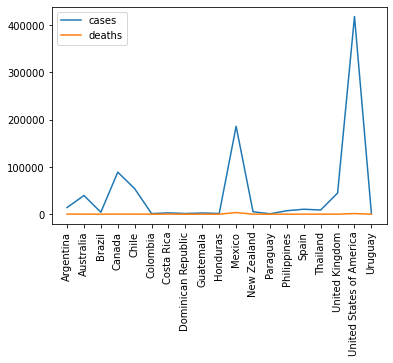

In [84]:
#plot countries
cases = []
deaths = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        cases.append(swine["Cumulative no. of cases"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

plt.xticks(rotation = 90)
plt.plot(country, cases)
plt.plot(country, deaths)
plt.legend(["cases", "deaths"])
plt.show()

#plot countries
plt.plot(swine["Country"], swine["Percent of Deaths"])

In [92]:
drop = []
us = {"United States":"United States of America"}
education['Country'] = education['Country'].replace(us)
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
keep = set(range(education.shape[0])) - set(drop)
swine_edu = education.take(list(keep))
# swine_edu = swine.merge(education, on = "Country", how = 'left')
# swine_edu = swine_edu.fillna(0)
swine_edu


,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,mean
9,Argentina,ARG,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,103.352249,101.645012,103.106438,102.973740,103.893570,99.962761,98.706253,98.547241,NaN,95.416323
13,Australia,AUS,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
154,Mexico,MEX,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,106.011009,109.425041,110.508843,104.909821,103.969391,104.097839,102.255890,102.465538,NaN,94.286380
29,Brazil,BRA,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.120073
35,Canada,CAN,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.211543
39,Chile,CHL,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.820168,98.699043,98.900558,96.976959,95.482552,94.753563,96.242104,98.247017,NaN,93.679037
45,Colombia,COL,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,109.668221,99.794441,99.242203,100.033051,101.711250,105.986801,106.769386,106.765732,NaN,88.038719
48,Costa Rica,CRI,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,102.410400,98.649651,98.426071,99.586601,97.320908,96.778374,98.594368,102.738052,104.592140,87.902015
180,New Zealand,NZL,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.465057
187,Philippines,PHL,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,98.586906,NaN,NaN,108.677528,115.436897,105.755257,NaN,93.056722


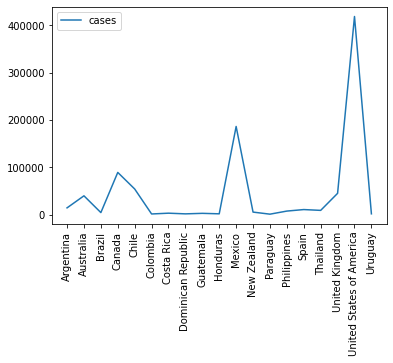

In [94]:
#plot cases
cases = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        cases.append(swine["Cumulative no. of cases"][i])

plt.xticks(rotation = 90)
plt.plot(country, cases)
plt.legend(["cases"])
plt.show()

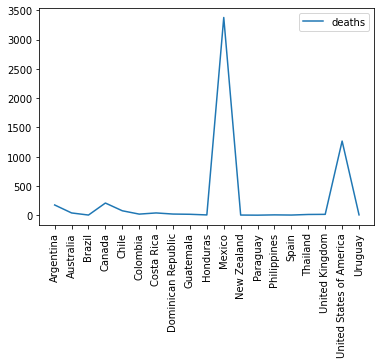

In [95]:
#plot deaths
deaths = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

plt.xticks(rotation = 90)
plt.plot(country, deaths)
plt.legend(["deaths"])
plt.show()

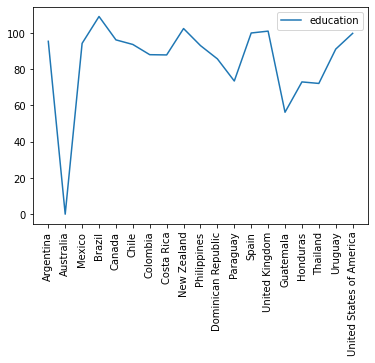

In [96]:
# education["mean"].fillna(0, inplace = True)
# education
plt.xticks(rotation = 90)
plt.plot(list(swine_edu["Country"]), list(swine_edu["mean"]))
plt.legend(["education"])
plt.show()

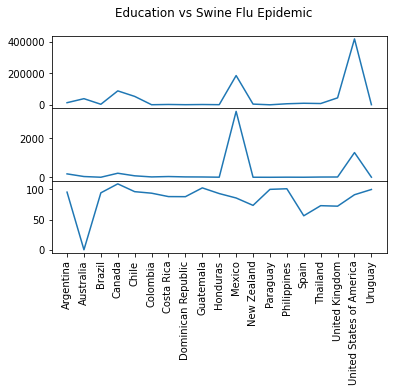

In [97]:
fig, axs = plt.subplots(3)
fig.suptitle("Education vs Swine Flu Epidemic")
axs[0].plot(country, cases)
axs[1].plot(country, deaths)
axs[2].plot(country, list(swine_edu["mean"]))
plt.xticks(rotation = 90)
plt.setp(axs[0].get_xticklabels(), visible = False)
plt.setp(axs[1].get_xticklabels(), visible = False)
plt.subplots_adjust(hspace = .0)

# plt.legend(["education"])
plt.show()